#  ❗ 딥러닝 ❗

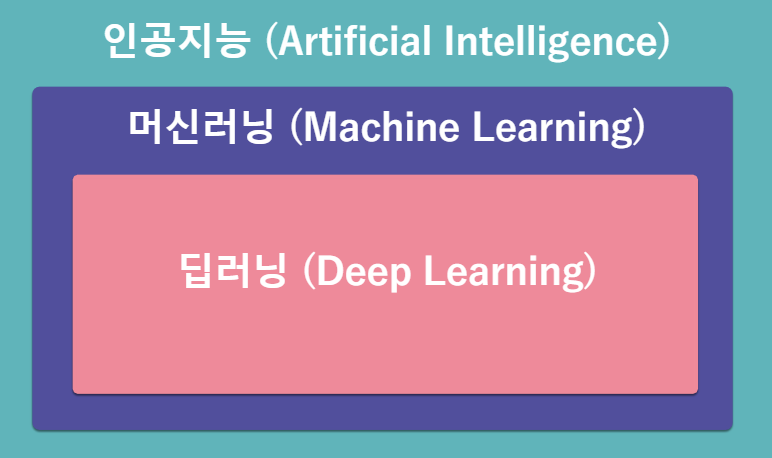

 ## ✔인공신경망에 기반하여 컴퓨터에게 사람의 사고방식을 가르치는 방법

✔ 단층 퍼셉트론

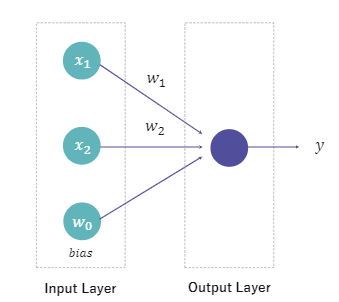

딥러닝 이전에는 퍼셉트론으로 시작되었는데, 퍼셉트론을 활용한 선형분류로는 데이터 분류가 힘들었다.

입력층과 출력층만 존재한 단층 퍼셉트론에서 단층 퍼셉트론을 여러개로 쌓는 다층 퍼셉트론이 나왔다.


✔ 다층 퍼셉트론

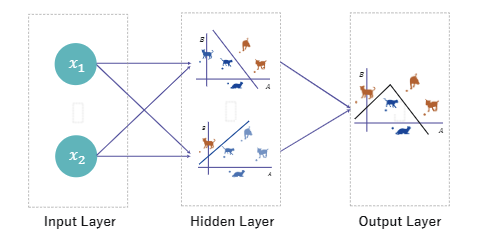

이 다층 퍼셉트론에는 입력층 히든층 출력층으로 존재하는데,

히든층은 입력층과 출력층 사이에 있는 모든 layer를 뜻한다.


✔ 딥러닝

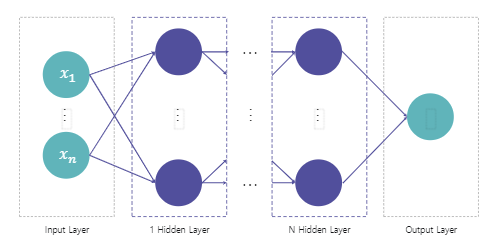


히든층이 많아진다면, 깊은 신경망이라는 의미로 딥러닝이 사용되었다.

# 1️⃣ 딥러닝 모델 구축

    -keras 메소드를 이용하여 모델을 구축함.
    
   ## ✔ 모델 클래스 객체 생성
   
            -   tf.keras.model.Sequential()
            
   ## ✔ 모델의 각 Layer 구성
   
            -    tf.keras.layer.Dense(레이어 안의 node의 수, 적용할 activation 함수)
            
   ##  ✔ Input Layer의 입력 형태
   
            -    입력형태에 대한 정보가 필요(input_shape / input_dim 인자 설정)

In [ ]:
# keras 모델 구축 예시 1

model = tf.keras.models.Sequential([
    # 첫번째 layer 이므로 input_dim인 입력변수가 지정됨.
    # 2개의 입력변수, 10개의 노드
    tf.keras.layers.Dense(10, input_dim=2, activation='sigmoid'),
    # 10개의  노드
    tf.keras,layers.Dense(10, activation='sigmoid'),
    # 1개의  노드
    tf.keras.layers.Dense(1, activation='sigmoid'),
]
)


위와 똑같은 모델구축인데, 

밑에 있는 구축은 빈 객체 모델을 선언한 후 구축하는 방법이다.

In [ ]:
# keras 모델 구축 예시2

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1z activation='sigmoid'))


# 2️⃣ 모델 학습시키기


   ## ✔ 모델 학습 방식을 설정하기 위한 함수
            [model].compile( loss =모델 학습 최적화 방법, optimizer =손실 함수 설정)
            
   ## ✔ 모델을 학습시키기 위한 함수
            [model].fit( 학습데이터, 학습데이터의 label)
            

In [ ]:
# 모델 학습 예시

# M S E 를 loss로 설정, 최적화 방식은 S G D 사용

model.compile(loss='mean_squared_err', optimizer='SGD')

# dataset에 저장된 데이터를 입력하고, epochs를 100으로 설정하고 학습

model.fit(dataset, epochs=100)


# 3️⃣ 모델 평가 및 예측하기


   ## ✔ 모델을 평가하기 위한 메소드
                [model].evaluate(테스트 데이터, 테스트 데이터의 label)
        
   ## ✔ 모델로 예측을 수행하기 위한 함수
                [model].predict(예측하고자 하는 데이터)
                

In [ ]:
# 모델 평가 예제

model.evaluate(X_test, Y_test)

predicted_labels_test = model.predict(X_test)


# 📢신경망 모델로 분류


   ##  ✔  Iris 데이터가 주어졌을 때 붓꽃의 종류를 분류하는 신경망 모델을 구현
   
   ##  ✔  분류 모델에서는 마지막 레이어에 분류 데이터의 label 범주의 개수만큼 노드를 설정
   
   ##  ✔  분류에서는 일반적으로 loss를 ‘sparse_categorical_crossentropy’으로 사용
   
   ##  ✔  activation 인자로 ‘softmax’ 를 설정
   
   ##  ✔  optimizer 인자로 ‘adam’ 를 설정
   
   ##  ✔  metrics 인자는 에포크마다 계산되는 평가 지표를 의미하며, 정확도를 의미하는 ‘accuracy’ 를 입력하면 에포크마다 accuracy를 계산하여 출력
   
   

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

np.random.seed(100)
tf.set_random_seed(100)

# sklearn에 저장된 데이터를 불러 온다.
X, Y = load_iris(return_X_y = True)


# DataFrame으로 변환
df = pd.DataFrame(X, columns=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = Y

X = df.drop(columns=['클래스'])
Y = df['클래스']

df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,클래스
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



Iris 데이터는 위와 같이 구성되어 있다.

X 에는  클래스 부분을 지웠고, Y 에는 클래스만 넣었으므로

받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이 네 가지 변수와 세 종류의 붓꽃 클래스로 구성되어 있다.


In [9]:

# 학습용 / 평가용 데이터로 분리함.
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Dataset 형태로 변환함.
# tensor로 넘겨줘야 하므로 .values 붙어 보내야함.
train_ds = tf.data.Dataset.from_tensor_slices((train_X.values, train_Y))

train_ds = train_ds.shuffle(len(train_X)).batch(batch_size=5)

"""
   keras를 활용하여 신경망 모델을 생성하고
   3가지 범주를 갖는 label 데이터를 분류하기 위해서 마지막 레이어 노드를 아래와 같이 설정한다.
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=4),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

# 학습용 데이터를 바탕으로 모델의 학습을 수행한다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_ds, epochs=100, verbose=2)

# 테스트용 데이터를 바탕으로 학습된 모델을 평가한다.
# #evaluate 함수자체가 tensor로 알아서 하므로 .valus 안해도 됨.
loss, acc = model.evaluate(test_X, test_Y) # acc 의 값은 정확도의 값.

# 테스트용 데이터의 예측값을 구한다.
predictions = model.predict(test_X)

# 결과를 출력한다.
print("테스트 데이터의 Accuracy 값: ", acc)
for i in range(5):
    print("%d 번째 테스트 데이터의 실제값: %d" % (i, test_Y.iloc[i]))
    print("%d 번째 테스트 데이터의 예측값: %d" % (i, np.argmax(predictions[i])))

Epoch 1/100
24/24 - 0s - loss: 2.1914 - acc: 0.4333
Epoch 2/100
24/24 - 0s - loss: 1.0864 - acc: 0.6750
Epoch 3/100
24/24 - 0s - loss: 0.7805 - acc: 0.6167
Epoch 4/100
24/24 - 0s - loss: 0.7527 - acc: 0.6083
Epoch 5/100
24/24 - 0s - loss: 0.7146 - acc: 0.6750
Epoch 6/100
24/24 - 0s - loss: 0.6844 - acc: 0.6750
Epoch 7/100
24/24 - 0s - loss: 0.6588 - acc: 0.6833
Epoch 8/100
24/24 - 0s - loss: 0.6357 - acc: 0.6833
Epoch 9/100
24/24 - 0s - loss: 0.6151 - acc: 0.6917
Epoch 10/100
24/24 - 0s - loss: 0.5966 - acc: 0.7250
Epoch 11/100
24/24 - 0s - loss: 0.5797 - acc: 0.7333
Epoch 12/100
24/24 - 0s - loss: 0.5644 - acc: 0.7500
Epoch 13/100
24/24 - 0s - loss: 0.5503 - acc: 0.7583
Epoch 14/100
24/24 - 0s - loss: 0.5372 - acc: 0.7667
Epoch 15/100
24/24 - 0s - loss: 0.5251 - acc: 0.7750
Epoch 16/100
24/24 - 0s - loss: 0.5138 - acc: 0.7833
Epoch 17/100
24/24 - 0s - loss: 0.5031 - acc: 0.8000
Epoch 18/100
24/24 - 0s - loss: 0.4930 - acc: 0.8000
Epoch 19/100
24/24 - 0s - loss: 0.4835 - acc: 0.8000
Ep

점점 갈수록 loss값이 줄어드는 것을 확인 할 수 있다.

처음의 loss 값은 2.1914 였는데 마지막의 loss 값은 0.1571로 나오고 정확도 값은 acc: 0.9667 이 나왔다.
    
테스트 데이터의 Accuracy 값은  0.96666664로 유사한 값으로 나왔다.

고로 테스트의 실제값과 예측값이 같은 것으로 정확도가 좋은 것을 확인할 수 있다. 